# Overview of the dataset
Reading and visualizing a single sample:

In [1]:
#imports and global variables
import numpy as np
import os
import csv
import pandas as pd
import random
from scipy import stats
from scipy.signal import find_peaks
import json
samples = 219

data_path = './Dataset'

Sample User Characteristics:
User Id: 54
User Age: 62
User Occupation: Administrative Assistent


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


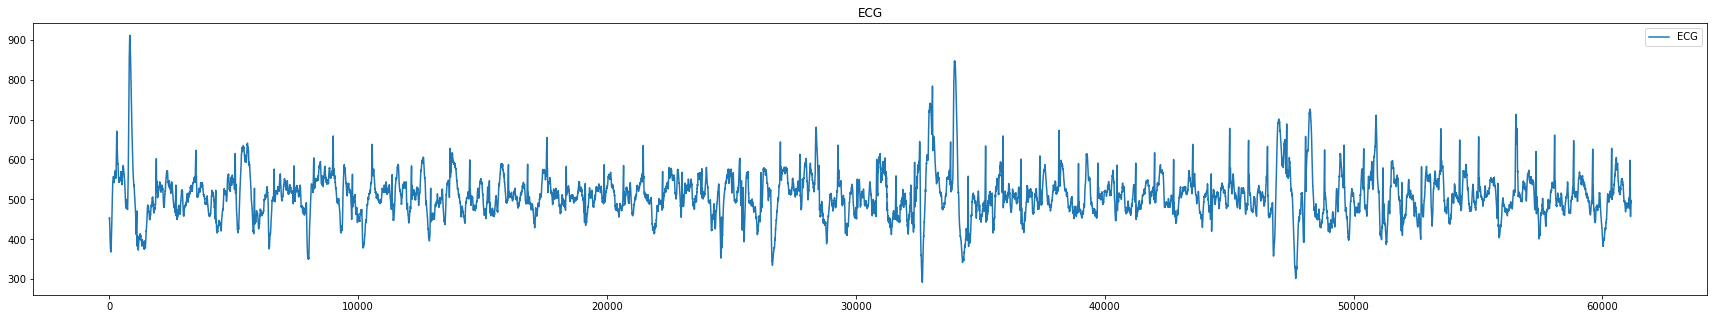

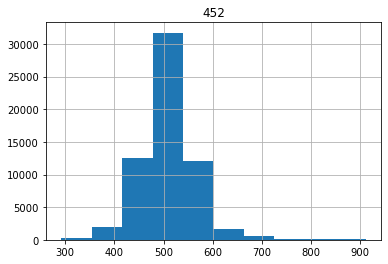

In [2]:
#read all files for random sample and print info
a = random.randint(1,samples)
sample_path = os.path.join(data_path,str(a))
json_path = os.path.join(sample_path,str(a)+'.json')
#read data and visualize
with open(json_path, 'r') as f:
    sample_data =  json.load(f)
    user_id = sample_data['ID']
    user_age = sample_data['Age']
    user_weight = sample_data['Weight']
    user_height = sample_data['Height']
    user_education = sample_data['Education']
    user_occupation = sample_data['Occupation']
    user_region = sample_data['Region']
    user_covid = sample_data['COVID-19_vaccinated']
    user_gymfreq= sample_data['Gym_frequency']
    user_sport = sample_data['Sport_practice']
    user_freqexerc = sample_data['Frequency_of_exercise']
    user_exercsdur = sample_data['Exercise_session_duration']
    user_prefexrc = sample_data['Prefered_exercises']
    user_specdiet = sample_data['Specific_diet']
    user_fruitsveg = sample_data['Fruits-vegetables_per_day']
    user_junkfood = sample_data['Candy-Salty_snacks-soda_consumption']
    user_wcoms = sample_data['Water_consumption']
    user_hprobl = sample_data['Health_problems']
    user_dmed = sample_data['Daily_medication']
    user_shab = sample_data['Smoking_habits']
    user_shours = sample_data['Sleeping_hours']
    user_abc = sample_data['Alcoholic_beverage_consumption']
    sensors = sample_data['sensors']['name']
    print("Sample User Characteristics:")
    print("User Id:",user_id)
    print("User Age:",user_age)
    print("User Occupation:",user_occupation)
    df = pd.read_csv(os.path.join(sample_path,str(a)+".txt"),'\t', skiprows=3)
    if(len(df.columns)>1):
        df = df.iloc[:,5:6]
    graf = df.plot(title='ECG', figsize=(30,5))
    graf.legend(['ECG'])
    df.hist()

In [3]:
from sklearn.preprocessing import StandardScaler
# import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn

# Classification Gender

In [4]:
genderfile_csv = os.path.join(data_path, 'TabelaGender.csv')
df_gender = pd.read_csv(genderfile_csv)
df_gender.columns = df_gender.columns.str.replace("Average of ", "")
df_gender.drop('ID', inplace=True, axis=1)

Classification on gender features:

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn

train, test = train_test_split(df_gender, test_size=0.3)

X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

#Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Classifier comparison


........ Score and Classification Report for Nearest Neighbors .............

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        31
           1       0.52      0.48      0.50        31

    accuracy                           0.52        62
   macro avg       0.52      0.52      0.52        62
weighted avg       0.52      0.52      0.52        62



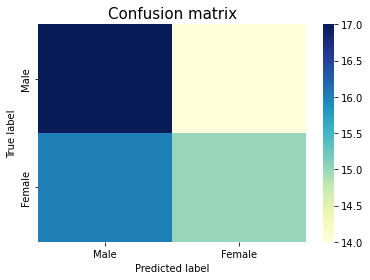


........ Score and Classification Report for Linear SVM .............

              precision    recall  f1-score   support

           0       0.58      0.81      0.68        31
           1       0.68      0.42      0.52        31

    accuracy                           0.61        62
   macro avg       0.63      0.61      0.60        62
weighted avg       0.63      0.61      0.60        62



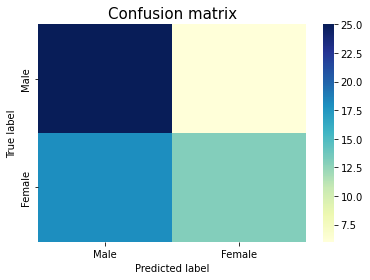


........ Score and Classification Report for RBF SVM .............

              precision    recall  f1-score   support

           0       0.40      0.13      0.20        31
           1       0.48      0.81      0.60        31

    accuracy                           0.47        62
   macro avg       0.44      0.47      0.40        62
weighted avg       0.44      0.47      0.40        62



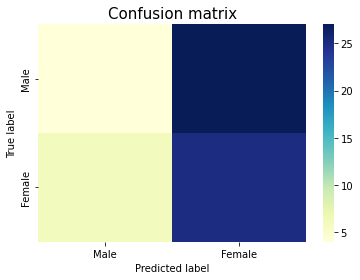


........ Score and Classification Report for Decision Tree .............

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        31
           1       0.62      0.65      0.63        31

    accuracy                           0.63        62
   macro avg       0.63      0.63      0.63        62
weighted avg       0.63      0.63      0.63        62



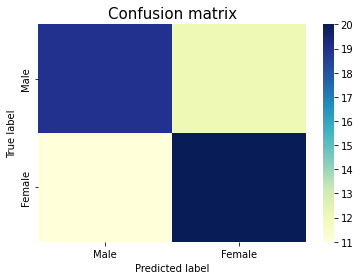


........ Score and Classification Report for Random Forest .............

              precision    recall  f1-score   support

           0       0.58      0.48      0.53        31
           1       0.56      0.65      0.60        31

    accuracy                           0.56        62
   macro avg       0.57      0.56      0.56        62
weighted avg       0.57      0.56      0.56        62



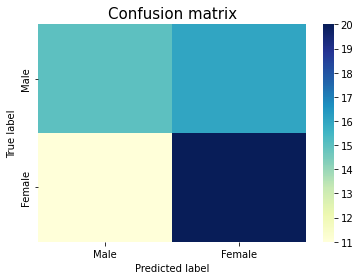


........ Score and Classification Report for Neural Net .............

              precision    recall  f1-score   support

           0       0.52      0.45      0.48        31
           1       0.51      0.58      0.55        31

    accuracy                           0.52        62
   macro avg       0.52      0.52      0.51        62
weighted avg       0.52      0.52      0.51        62



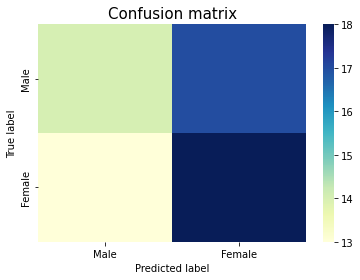


........ Score and Classification Report for AdaBoost .............

              precision    recall  f1-score   support

           0       0.64      0.45      0.53        31
           1       0.57      0.74      0.65        31

    accuracy                           0.60        62
   macro avg       0.61      0.60      0.59        62
weighted avg       0.61      0.60      0.59        62



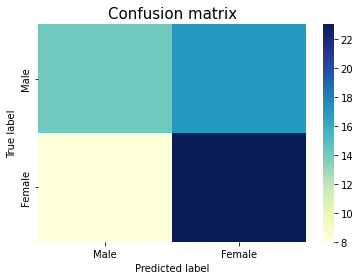


........ Score and Classification Report for Naive Bayes .............

              precision    recall  f1-score   support

           0       0.64      0.45      0.53        31
           1       0.57      0.74      0.65        31

    accuracy                           0.60        62
   macro avg       0.61      0.60      0.59        62
weighted avg       0.61      0.60      0.59        62



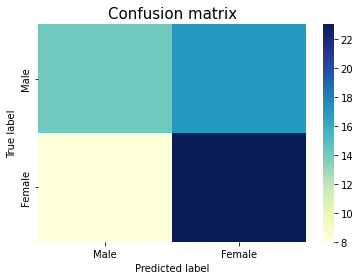

|       Classifier        |          Score          |
------------------------------------------------------
|    Nearest Neighbors    |   0.5161290322580645    |
|       Linear SVM        |   0.6129032258064516    |
|         RBF SVM         |   0.46774193548387094   |
|      Decision Tree      |   0.6290322580645161    |
|      Random Forest      |   0.5645161290322581    |
|       Neural Net        |   0.5161290322580645    |
|        AdaBoost         |   0.5967741935483871    |
|       Naive Bayes       |   0.5967741935483871    |


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
]
alllabels = ['Male', 'Female']
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print('\n........ Score and Classification Report for {0} .............\n'.format(name))
    scores.append(score)
    print(classification_report(y_test, y_pred))

    cfm1 = confusion_matrix(y_test, y_pred)
    seaborn.heatmap(cfm1, xticklabels=alllabels, yticklabels=alllabels,cmap = 'YlGnBu')
    plt.title('Confusion matrix', fontsize = 15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
print("|{0:^25}|{1:^25}|".format("Classifier","Score"))
print("------------------------------------------------------")
for name,score in zip(names,scores):
    print("|{0:^25}|{1:^25}|".format(name,score))

# Classification Diseases

In [7]:
diseasefile_csv = os.path.join(data_path, 'TabelaDis.csv')
df_dis = pd.read_csv(diseasefile_csv)
df_dis.columns = df_dis.columns.str.replace("Average of ", "")
df_dis.drop('ID', inplace=True, axis=1)

Classification on disease features:

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn

train, test = train_test_split(df_dis, test_size=0.5)

X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

#Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Classifier comparison


........ Score and Classification Report for Nearest Neighbors .............

              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       0.18      0.50      0.27         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.19      0.33      0.24        18
   macro avg       0.12      0.38      0.18        18
weighted avg       0.11      0.33      0.17        18



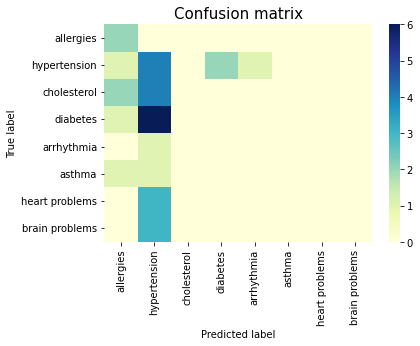


........ Score and Classification Report for Linear SVM .............

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.26      1.00      0.41         8

   micro avg       0.25      0.80      0.38        10
   macro avg       0.13      0.50      0.21        10
weighted avg       0.21      0.80      0.33        10



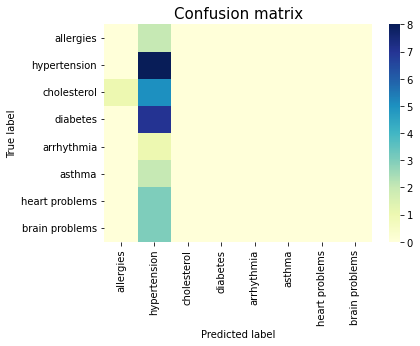


........ Score and Classification Report for RBF SVM .............

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.21      0.75      0.33         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7

   micro avg       0.19      0.26      0.22        23
   macro avg       0.05      0.19      0.08        23
weighted avg       0.07      0.26      0.12        23



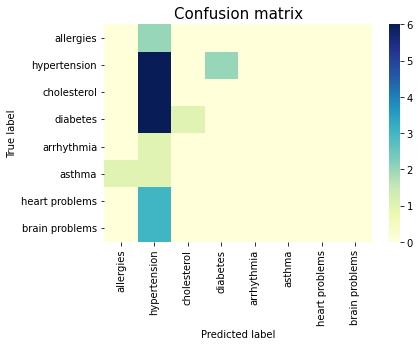


........ Score and Classification Report for Decision Tree .............

              precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       0.20      0.38      0.26         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

   micro avg       0.12      0.15      0.14        27
   macro avg       0.06      0.15      0.08        27
weighted avg       0.07      0.15      0.09        27



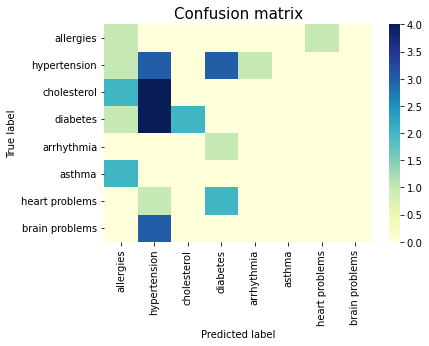


........ Score and Classification Report for Random Forest .............

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           1       0.24      0.50      0.32         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3

   micro avg       0.22      0.26      0.24        27
   macro avg       0.25      0.31      0.20        27
weighted avg       0.20      0.26      0.18        27



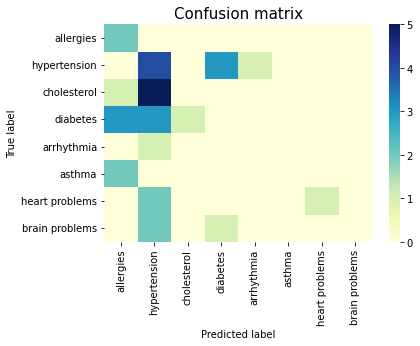


........ Score and Classification Report for Neural Net .............

              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       0.22      0.50      0.31         8
           2       0.00      0.00      0.00         6
           3       0.20      0.14      0.17         7
           6       0.00      0.00      0.00         3

   micro avg       0.22      0.27      0.24        26
   macro avg       0.14      0.33      0.18        26
weighted avg       0.14      0.27      0.17        26



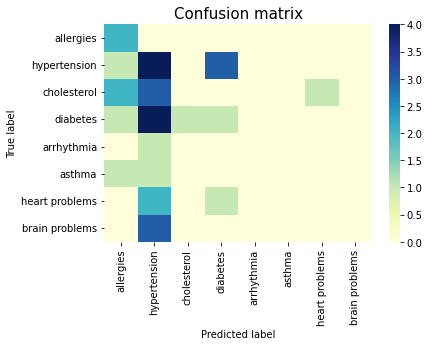


........ Score and Classification Report for AdaBoost .............

              precision    recall  f1-score   support

           1       0.23      0.62      0.33         8
           2       0.22      0.33      0.27         6
           6       0.00      0.00      0.00         3

   micro avg       0.22      0.41      0.29        17
   macro avg       0.15      0.32      0.20        17
weighted avg       0.19      0.41      0.25        17



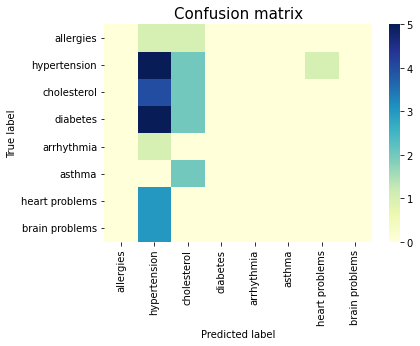


........ Score and Classification Report for Naive Bayes .............

              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       0.29      0.62      0.40         8
           2       0.00      0.00      0.00         6
           3       0.25      0.14      0.18         7
           6       1.00      0.33      0.50         3

   micro avg       0.28      0.35      0.31        26
   macro avg       0.37      0.42      0.31        26
weighted avg       0.30      0.35      0.26        26



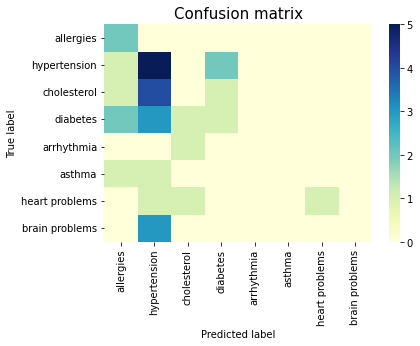

|       Classifier        |          Score          |
------------------------------------------------------
|    Nearest Neighbors    |         0.1875          |
|       Linear SVM        |          0.25           |
|         RBF SVM         |         0.1875          |
|      Decision Tree      |          0.125          |
|      Random Forest      |         0.21875         |
|       Neural Net        |         0.21875         |
|        AdaBoost         |         0.21875         |
|       Naive Bayes       |         0.28125         |


In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
]
alllabels = ['allergies', 'hypertension', 'cholesterol', 'diabetes', 'arrhythmia', 'asthma', 'heart problems', 'brain problems']

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print('\n........ Score and Classification Report for {0} .............\n'.format(name))
    scores.append(score)
    print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

    cfm1 = confusion_matrix(y_test, y_pred)
    seaborn.heatmap(cfm1, xticklabels=alllabels, yticklabels=alllabels,cmap = 'YlGnBu')
    plt.title('Confusion matrix', fontsize = 15)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
print("|{0:^25}|{1:^25}|".format("Classifier","Score"))
print("------------------------------------------------------")
for name,score in zip(names,scores):
    print("|{0:^25}|{1:^25}|".format(name,score))